<a href="https://colab.research.google.com/github/Suryansh555/DataScience/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1zEnTNe_fvxU9XzfVPbAgAmRmKK_gmMx3')

# OTT - Analysis with Visual Representation

Dataset which I have chosen for this Project is from Kaggle named "Movies on Netflix, Prime Video, Hulu and Disney+". This project will visualize this dataset and give an idea of what movies are available in these OTT , how many movies these OTT are providing and will categorise the movies depending on their rating and their length keeping their platform in mind. This project is being build as a course Project for [Data Analysis with Python: Zero to Pandas](zerotopandas.com) where i have learned python from scratch to analysing and visualizing data using python.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - The dataset needs to be downloaded from the kaggle website.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suryanshshrivastava
Your Kaggle Key: ········


100%|██████████| 627k/627k [00:00<00:00, 138MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './movies-on-netflix-prime-video-hulu-and-disney'

In [ ]:
import os
os.listdir(data_dir)

['MoviesOnStreamingPlatforms_updated.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "ott-analysis-with-visual-representation" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suryansh-may/ott-analysis-with-visual-representation" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation


'https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation'

## Data Preparation and Cleaning

We are going to see how many column and rows we have in our dataset, what are the headers of the dataset and we will replace NaN (not given values) with something so that the data can be cleaned up before visualisation.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [ ]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
dataset.shape

(16744, 17)

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [ ]:
dataset.sort_values('Year', ascending=True).head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4467,4467,4468,A Trip to the Moon,1902,all,8.2,100%,0,0,1,0,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi",France,"None,French",13.0
8795,8795,8796,From the Manger to the Cross,1912,7+,5.7,NaN,0,0,1,0,0,Sidney Olcott,"Biography,Drama",United States,English,60.0
9917,9917,9918,Fatty Joins the Force,1913,NaN,5.3,NaN,0,0,1,0,0,George Nichols,"Comedy,Short",United States,English,12.0
10170,10170,10171,The Speed Kings,1913,NaN,5.0,NaN,0,0,1,0,0,Wilfred Lucas,"Short,Action,Comedy",United States,English,8.0
6257,6257,6258,A Fool There Was,1915,NaN,5.8,80%,0,0,1,0,0,Frank Powell,Drama,United States,English,67.0
10649,10649,10650,"Mabel, Fatty and the Law",1915,NaN,5.3,NaN,0,0,1,0,0,Roscoe 'Fatty' Arbuckle,"Comedy,Short",United States,English,11.0
4912,4912,4913,The Birth of a Nation,1915,7+,6.4,93%,0,0,1,0,0,D.W. Griffith,"Drama,History,War",United States,None,195.0
11524,11524,11525,Her Painted Hero,1915,NaN,4.7,NaN,0,0,1,0,0,F. Richard Jones,"Comedy,Short",United States,English,21.0
4619,4619,4620,Intolerance: Love's Struggle Throughout the Ages,1916,NaN,7.8,97%,0,0,1,0,0,D.W. Griffith,"Drama,History",United States,English,163.0
9095,9095,9096,A Romance of the Redwoods,1917,NaN,5.7,NaN,0,0,1,0,0,Cecil B. DeMille,"Adventure,Comedy,Drama,History,Romance,Western",United States,NaN,91.0


In [ ]:
dataset.replace(np.nan,"Not Calculated")

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,Not Calculated,6.2,Not Calculated,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120
16740,16740,16741,The Poof Point,2001,7+,4.7,Not Calculated,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90
16741,16741,16742,Sharks of Lost Island,2013,Not Calculated,5.7,Not Calculated,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,Not Calculated
16742,16742,16743,Man Among Cheetahs,2017,Not Calculated,6.6,Not Calculated,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,Not Calculated


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suryansh-may/ott-analysis-with-visual-representation" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation


'https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation'

## Exploratory Analysis and Visualization

 Now we are going to visualize useful data so that it can be presented to everyone

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Dividing the data into their platforms

In [ ]:
netflix_movies = dataset.loc[dataset['Netflix'] == 1]
hulu_movies = dataset.loc[dataset['Hulu'] == 1]
prime_video_movies = dataset.loc[dataset['Prime Video'] == 1]
disney_movies = dataset.loc[dataset['Disney+'] == 1]

In [ ]:
index_netflix = netflix_movies.index
total_netflix_movies = len(index_netflix)

index_hulu = hulu_movies.index
total_hulu_movies = len(index_hulu)

index_prime = prime_video_movies.index
total_prime_movies = len(index_prime)

index_disney = disney_movies.index
total_disney_movies = len(index_disney)

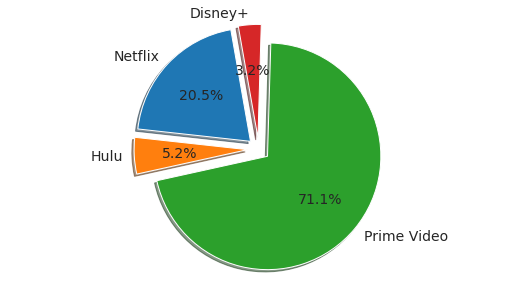

In [ ]:
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [total_netflix_movies,total_hulu_movies,total_prime_movies,total_disney_movies]
explode = (0.1, 0.1, 0.1, 0.1 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)

ax1.axis ('equal')
plt.show()

Based on Rating :-

In [ ]:
# streaming platform with most movies above 8+ rating (IMDb)
rate_mov_net = netflix_movies['IMDb'] > 8
print("Total Movies on Netflix with more than 8+ rating(IMDb) :",rate_mov_net.sum())

Total Movies on Netflix with more than 8+ rating(IMDb) : 129


In [ ]:
rate_mov_dis = disney_movies['IMDb'] > 8
print("Total Movies on Disney+ with more than 8+ rating(IMDb) :",rate_mov_dis.sum())

Total Movies on Disney+ with more than 8+ rating(IMDb) : 21


In [ ]:
rate_mov_pvm = prime_video_movies['IMDb'] > 8
print("Total Movies on amazon prime video with more than 8+ rating(IMDb) :",rate_mov_pvm.sum())

Total Movies on amazon prime video with more than 8+ rating(IMDb) : 324


In [ ]:
rate_mov_hulu = hulu_movies['IMDb'] > 8
print("Total Movies on Hulu with more than 8+ rating(IMDb) :",rate_mov_hulu.sum())

Total Movies on Hulu with more than 8+ rating(IMDb) : 23


In [ ]:
top_rated = [rate_mov_net.sum(),rate_mov_dis.sum(),rate_mov_pvm.sum(),rate_mov_hulu.sum()]
top_plat = ['Netflix', 'Disney', 'Prime Video', 'Hulu']

top_rated_data = pd.DataFrame({
    'platforms' : ['Netflix', 
                   'Disney', 
                   'Prime Video', 
                   'Hulu'],
    'total_mov' : [rate_mov_net.sum(),
                   rate_mov_dis.sum(),
                   rate_mov_pvm.sum(),
                   rate_mov_hulu.sum()]
})

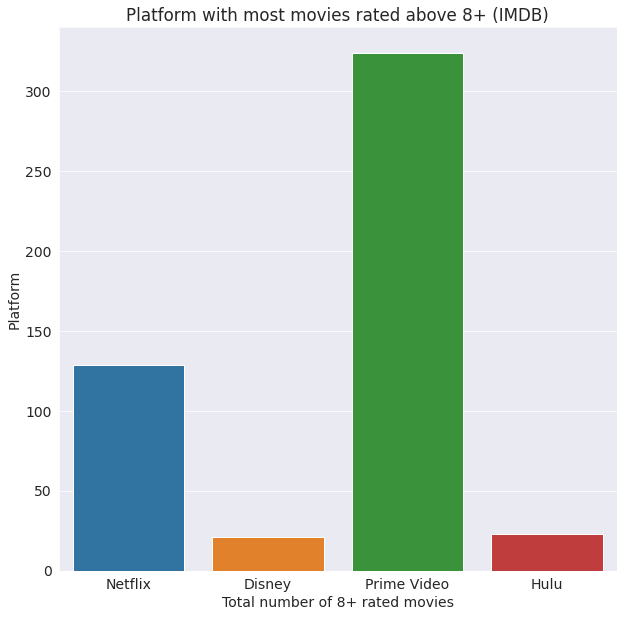

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = top_rated_data,
           x = top_rated_data['platforms'],
           y = top_rated_data['total_mov']
)
plt.ylabel('Platform')
plt.xlabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')
plt.show()

Runtime :-

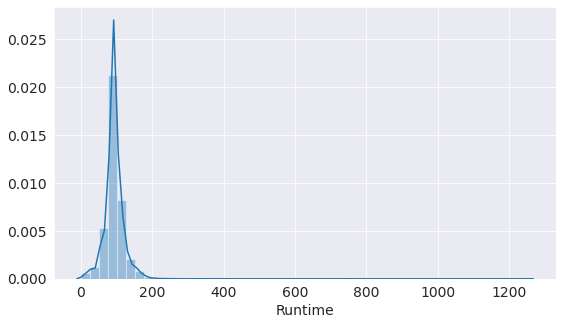

In [ ]:
sns.distplot(dataset['Runtime']);

IMDb Rating :-

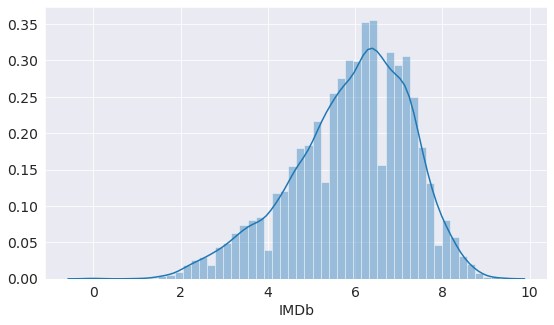

In [ ]:
sns.distplot(dataset['IMDb']);

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suryansh-may/ott-analysis-with-visual-representation" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation


'https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation'

## Asking and Answering Questions

Here we will encounter some questions and we will answer them using the dataset.

#### Q1: How many Movies are there on Netflix ?

In [ ]:
MovieOnNetflix = dataset['Netflix'].sum()

In [ ]:
print("There are " + str(MovieOnNetflix)+" movies on Netflix")

There are 3560 movies on Netflix


#### Q2: How many movies on Netflix have Rotten Tomatoes Rating equal to 97% ?

In [ ]:
RottenToma = netflix_movies['Rotten Tomatoes'] == "97%"

In [ ]:
Tomo = netflix_movies[RottenToma].shape[0]

In [ ]:
print("There are",Tomo,"movies on Netflix having Rotten Tomatoes Rating Equal to 97%")

There are 15 movies on Netflix having Rotten Tomatoes Rating Equal to 97%


#### Q3: How many Movies are common in Netflix and Amazon Prime 

In [ ]:
Primeandnetflix =  netflix_movies["Prime Video"] == 1

In [ ]:
Table = netflix_movies[Primeandnetflix]

In [ ]:
countofnetPrime = Table.shape[0]

In [ ]:
print("There are",countofnetPrime,"movies common in Netflix and Prime")

There are 345 movies common in Netflix and Prime


#### Q4: How many Movies are available in Hindi Only ?

In [ ]:
HindiOnly = dataset["Language"] == "Hindi"

In [ ]:
countHindi = dataset[HindiOnly].shape[0]

In [ ]:
print("There are",countHindi,"movies are avilable which have only Hindi Audio")

There are 503 movies are avilable which have only Hindi Audio


#### Q5: Maximum Number of Movies by a single Director irrespective of OTT Platform ? 

In [ ]:
Directors = dataset.groupby("Directors")["Netflix","Prime Video","Hulu","Disney+"].sum()

<ipython-input-175-e479c230c709>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Directors = dataset.groupby("Directors")["Netflix","Prime Video","Hulu","Disney+"].sum()


In [ ]:
Directors_Main = Directors["Netflix"] + Directors["Prime Video"] + Directors["Hulu"] + Directors["Disney+"]

In [ ]:
Directors["SumofMovies"] = Directors_Main

In [ ]:
HighestMovie = Directors.sort_values("SumofMovies", ascending=False).head(1)

In [ ]:
HighestMovieByDirector = HighestMovie["SumofMovies"][0]

In [ ]:
print("Maximum No of Movies By a single Director irrespective of Platform is",HighestMovieByDirector)

Maximum No of Movies By a single Director irrespective of Platform is 41


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suryansh-may/ott-analysis-with-visual-representation" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation


'https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation'

## Inferences and Conclusion
 
All The OTT Platform have some movies in common. Prime Video has largest no of movies. Inspite of Prime Videos having largest no of movies , the average IMDb Rating of their movies is still more than that of other Platforms. The average IMBd Rating of all movies inspite of their platform is 6.2 Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

In the Future we can use Machine Learning Algorithm based on user's past movies and their prefered genre to suggest them movie based on their free time to watch with their family and friends.

Refereces :-
https://www.kaggle.com/nikhileshkos/recommended-ott-movies-shows-analysis

https://www.androidauthority.com/disneyplusvsnetflix1052636/#:~:text=Disney%20Plus%20has%20a%20much,case%20for%20years%20to%20come.&text=If%20you%20are%20looking%20for,edgier%2C%20Netflix%20wins%20hands%20down.



In [ ]:
import jovian


In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "suryansh-may/ott-analysis-with-visual-representation" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation


'https://jovian.ml/suryansh-may/ott-analysis-with-visual-representation'